# Problem Set 3 CS174
---
The following problem set will focus on the lessons on Bag of Words and TFIDF. Answer the following guide questions with your groups by writing functions or code in cells that accomplish the requirements.

1. Take your favorite Spotify or Apple Music playlist, and use their APIs to programmatically extract the first 20 song titles. Build a dictionary that has the song index as the key, and the title as the value. Please make sure that the playlist is **NOT** an instrumental playlist. **3 pts.**

2. Use the Genius API to programmatically download the lyrics of these songs and store them in a dictionary with the index as the key, and the lyrics as the value. **3 pts.**

3. Build a 20x20 matrix containing the cosine similarities of the songs to each other. Use Bag of Words to determine these similarities. **4 pts.**


4. Build a 20x20 matrix containing the cosine similarities of the songs to each other. Use TFIDF scores to determine these similarities. **5 pts.**

5. Compare the similarities using BoW and TFIDF. Analyze the results and discuss any findings that interest you. You can use heatmaps or other plots to present your analysis. **3 pts**

Guide Questions:
- Can this be used to determine playlist quality?
- What does this say about the homogeneity of the playlist themes?
- What does this say about how songs (in that playlist genre) are written?

6. Identify the top 5 most important words for each song using TFIDF. Discuss the relationship of these words to their respective songs and analyze if they can be used as passable summaries of the songs. **2 pts** 

Make sure to remove stopwords. No need to lemmatize or stem, but is very welcome.
       
### Bonus:
Do a TFIDF analysis for a single artist's top 5 songs. Identify the top 10 most important words and discuss an analysis of these. **5 pts.**

Deadline **March 17 11:59PM**. Submission link to be posted in Moodle. 
Submit a .zip file containing the notebook and a 'data/' directory containing the songs with name <SURNAME>_<ID NUMBER>.ipynb.
Make sure to remove or obfuscate any API keys you include in the final submission.
    
Sample: **"BAUTISTA_110464.zip"**

# 1. Spotify API to extract 20 song titles

1. Take your favorite Spotify or Apple Music playlist, and use their APIs to programmatically extract the first 20 song titles. Build a dictionary that has the song index as the key, and the title as the value. Please make sure that the playlist is **NOT** an instrumental playlist. **3 pts.**

## Setting up Spotify API

In [0]:
!pip install colab-env -qU
import colab_env

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# To add the Spotify client ID and secret, modify the add_env lines below and uncomment
from colab_env import envvar_handler

envvar_handler.add_env('SPOTIPY_CLIENT_ID', '8b4ef1fef08a46d1aae4e9f957491aa6')
envvar_handler.add_env('SPOTIPY_CLIENT_SECRET', 'e2c07f4c07f743018da06acbd1623009')

## Getting the playlist

In [0]:
!pip install spotipy

In [0]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Gets the credentials from the environment variables. Make sure that SPOTIPY_CLIENT_ID and SPOTIPY_CLIENT_SECRET
# are in your environment.
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [0]:
# Editing titles (i.e. removing the "Remastered" parts of the title)
def edit_title(title):
  if title == 'You Make My Dreams - Remastered':
    return 'You Make My Dreams'
  elif title == 'Let It Be - Remastered 2009':
    return 'Let It Be'
  elif title == "Don't Stop Me Now - 2011 Mix":
    return "Don't Stop Me Now"
  else:
    return title

In [0]:
PLAYLIST_URI = 'spotify:playlist:0fLLZQlgUdCUbfiDZ3kJq7'
NUM_TRACKS = 20

# Will modify the dictionary so as to include the artist as well as the song title.
# The structure will be a dictionary of two-element tuples. Example: {1 : ('Take On Me', 'a-ha')}

playlist_tracks = sp.playlist_tracks(PLAYLIST_URI)['items']
playlist_dict = {}
for i, track in enumerate(playlist_tracks[:NUM_TRACKS]):
  title = track['track']['name']
  title = edit_title(title)
  artists = ', '.join([artist['name'] for artist in track['track']['artists']])
  playlist_dict[i] = (title, artists)

print(playlist_dict)
songtitles = [playlist_dict[x][0] for x in playlist_dict]
songtitles

{0: ('I Wanna Dance with Somebody (Who Loves Me)', 'Whitney Houston'), 1: ('Wake Me up Before You Go-Go', 'Wham!'), 2: ('Take on Me', 'a-ha'), 3: ('Build Me Up Buttercup', 'The Foundations'), 4: ('Easy', 'Commodores'), 5: ('Hey Jude', 'The Beatles'), 6: ('September', 'Earth, Wind & Fire'), 7: ('You Make My Dreams', 'Daryl Hall & John Oates'), 8: ('Never Gonna Give You Up', 'Rick Astley'), 9: ('Dancing Queen', 'ABBA'), 10: ('Stand by Me', 'Ben E. King'), 11: ('More Than Words', 'Extreme'), 12: ('Walking On Sunshine', 'Katrina & The Waves'), 13: ("Ain't No Mountain High Enough", 'Marvin Gaye, Tammi Terrell'), 14: ("Don't Stop Believin'", 'Journey'), 15: ('Let It Be', 'The Beatles'), 16: ('My Girl', 'The Temptations'), 17: ("Don't Stop Me Now", 'Queen'), 18: ('Africa', 'TOTO'), 19: ('I Want You Back', 'The Jackson 5')}


['I Wanna Dance with Somebody (Who Loves Me)',
 'Wake Me up Before You Go-Go',
 'Take on Me',
 'Build Me Up Buttercup',
 'Easy',
 'Hey Jude',
 'September',
 'You Make My Dreams',
 'Never Gonna Give You Up',
 'Dancing Queen',
 'Stand by Me',
 'More Than Words',
 'Walking On Sunshine',
 "Ain't No Mountain High Enough",
 "Don't Stop Believin'",
 'Let It Be',
 'My Girl',
 "Don't Stop Me Now",
 'Africa',
 'I Want You Back']

## 2. Retrieving Lyrics from Genius
We obtain the lyrics of songs in the Spotify playlist using the Genius API.

In [0]:
dummy_song = ['Sun goes down, sun comes up\n', 'Days can drown in a plastic cup\n', 'In this town\n', 'In this town\n', '\n', "Don't know how, don't know when\n", 'Something came but it left again\n', "And I'm down\n", 'On this town\n', '\n', "'Cause no matter what I see\n", 'People love to disagree\n', '\n', 'Every time I say what I want to be\n', "Someone says that's not how it's going to be\n", 'Come on, baby, quit your dreaming\n', 'Grab your things, the train is leaving\n', 'Time to pick that somewhere you want to go\n', 'Get there quick or drown in the undertow\n', 'Come on baby, time is wasting\n', 'Choose a wheel and get to racing\n', '\n', 'Sun goes up and down again\n', 'Hard to stop feeling broken in\n', 'And worn down\n', 'By this town\n', '\n', 'All the same\n', 'You find me here\n', 'Placing blame and escaping fear and self-doubt\n', 'And this town\n', '\n', 'But no matter where I go\n', 'People love to tell me, "No"\n', '\n', 'Every time I say what I want to be\n', "Someone says that's not how it's going to be\n", 'Come on, baby, quit your dreaming\n', 'Grab your things, the train is leaving\n', 'Time to pick that somewhere you want to go\n', 'Get there quick or drown in the undertow\n', 'Come on, baby, time is wasting\n', 'Choose a wheel and get to racing\n', '\n', 'Every time I say what I want to be\n', "Someone says that's not how it's going to be\n", 'Come on baby, quit your dreaming\n', 'Grab your things, the train is leaving\n', 'And if you feel like nobody understands\n', 'You just smile and pray that they clap their hands\n', 'Come on, baby, drown your sorrow\n', 'Work today and live tomorrow\n', 'Time to pick that somewhere you want to go\n', 'Get there quick or drown in the undertow\n', 'Come on baby, time is wasting\n', 'Choose a wheel and get to racing ']

In [0]:
! pip install lyricsgenius

     |████████████████████████████████| 92kB 2.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [0]:
import lyricsgenius

#songs = {'Green Day':'Holiday', 'The All-American Rejects':'Dirty Little Secret', 'Blink-182':'First Date'}
songs = playlist_dict
lyrics_dict = {}
genius = lyricsgenius.Genius("lgrmQD5L0EqGrGCqmiXmHvizYtaDYeu5gAn0TRwD3FPEzE1WRL_Y2mBAZTdrMGB-")

for song in songs:
    lyric = genius.search_song(songs[song][0], songs[song][1])
    #print(lyric.lyrics,"\n")
    lyrics_dict[songs[song]] = lyric.lyrics

print(lyrics_dict)

Searching for "I Wanna Dance with Somebody (Who Loves Me)" by Whitney Houston...
Done.
Searching for "Wake Me up Before You Go-Go" by Wham!...
Done.
Searching for "Take on Me" by a-ha...
Done.
Searching for "Build Me Up Buttercup" by The Foundations...
Done.
Searching for "Easy" by Commodores...
Done.
Searching for "Hey Jude" by The Beatles...
Done.
Searching for "September" by Earth, Wind & Fire...
Done.
Searching for "You Make My Dreams" by Daryl Hall & John Oates...
Done.
Searching for "Never Gonna Give You Up" by Rick Astley...
Done.
Searching for "Dancing Queen" by ABBA...
Done.
Searching for "Stand by Me" by Ben E. King...
Done.
Searching for "More Than Words" by Extreme...
Done.
Searching for "Walking On Sunshine" by Katrina & The Waves...
Done.
Searching for "Ain't No Mountain High Enough" by Marvin Gaye, Tammi Terrell...
Done.
Searching for "Don't Stop Believin'" by Journey...
Done.
Searching for "Let It Be" by The Beatles...
Done.
Searching for "My Girl" by The Temptations...

Below this line, we process lyrics data.


# Pre-processing
The functions in this section take a list of lyrics (assumed to be one line per element) then performs word splitting, normalization (reduce all letters to lowercase), and lemmatization.

To make this a list of songs, we simply have one **song** per element.

Libraries for NLP.

In [0]:
!pip install -U nltk
import nltk
nltk.download('stopwords')


     |████████████████████████████████| 1.5MB 2.8MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449907 sha256=86e25e8cc166f9a2515f504500d4700933e3c1f056d8a0aeef8225f68deaf74e
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords 
from sklearn.metrics.pairwise import cosine_similarity

stopWords = set(stopwords.words('english'))

In [0]:
def lemmatize(word):
    res = word.lower().translate(str.maketrans('', '', string.punctuation))
    return res if not res in stopWords else ''

def get_song_lines_from_dict(lyrics_dict):
    song_lines = []
    for song_line in [lyrics_dict[index].rstrip().split() for index in lyrics_dict if len(lyrics_dict[index].strip()) > 0]:
      # Lemmatize using the function, then filter out empty strings.
        song_line = list(filter(lambda x: len(x)>0, [lemmatize(word) for word in song_line]))
        if len(song_line) > 0:
            song_lines.append(song_line)
    return song_lines

def get_song_lines_from_file(lyrics_file):
    with open(lyrics_file, 'r') as lyrics:
        song_lines = []
        for song_line in [line.rstrip().split() for line in lyrics if len(line.strip()) > 0]:
          # Lemmatize using the function, then filter out empty strings.
            song_line = list(filter(lambda x: len(x)>0, [lemmatize(word) for word in song_line]))
            if len(song_line) > 0:
                song_lines.append(song_line)
    return song_lines

def get_song_lines_from_list(lyrics_list):
    song_lines = []
    for song_line in [line.rstrip().split() for line in lyrics_list if len(line.strip()) > 0]:
      # Lemmatize using the function, then filter out empty strings.
        song_line = list(filter(lambda x: len(x)>0, [lemmatize(word) for word in song_line]))
        if len(song_line) > 0:
            song_lines.append(song_line)
    return song_lines

In [0]:
lyrics_dict

{('Africa',
  'TOTO'): '[Verse 1: David Paich]\nI hear the drums echoing tonight\nBut she hears only whispers of some quiet conversation\nShe\'s coming in, 12:30 flight\nHer moonlit wings reflect the stars that guide me towards salvation\nI stopped an old man along the way\nHoping to find some old forgotten words or ancient melodies\nHe turned to me as if to say\n"Hurry boy, it\'s waiting there for you"\n\n[Chorus: Bobby Kimball]\nIt\'s gonna take a lot to drag me away from you\nThere\'s nothing that a hundred men or more could ever do\nI bless the rains down in Africa\nGonna take some time to do the things we never had\n\n[Verse 2: David Paich]\nThe wild dogs cry out in the night\nAs they grow restless longing for some solitary company\nI know that I must do what\'s right\nAs sure as Kilimanjaro rises like Olympus above the Serengeti\nI seek to cure what\'s deep inside\nFrightened of this thing that I\'ve become\n\n[Chorus: Bobby Kimball]\nIt\'s gonna take a lot to drag me away from y

# Bag-of-words
Given a lyrics file, returns the BOW vector representation of each sentence (where sentence can be a line in a song, or an entire song).
# Cosine Similarity Matrix
Returns a matrix of the pairwise cosine similarities given a set of lyrics vectors.

In [0]:
def bag_of_words(list_of_sentences):
    wordset = set([lemmatize(word) for sentence in list_of_sentences for word in sentence if len(lemmatize(word)) > 0])
    results = []
    for sentence in list_of_sentences:
        results.append([1 if word in sentence else 0 for word in wordset])
    nicetable = pd.DataFrame(np.array(results), columns=list(wordset))
    return results

def cosine_similarity_matrix(bow_vectors):
    answer_matrix = [[] for i in range(len(bow_vectors))]
    for i in range(len(bow_vectors)):
      for j in range(len(bow_vectors)):
        answer_matrix[i].append(cosine_similarity([bow_vectors[i]], [bow_vectors[j]])[0][0])
    return pd.DataFrame(answer_matrix)#, index=songtitles, columns=songtitles)

def cosine_similarity_matrix_tfidf(tfidf_df):
    answer_matrix = [[] for i in range(len(tfidf_df))]
    for i in range(len(tfidf_df)):
      for j in range(len(tfidf_df)):
        answer_matrix[i].append(cosine_similarity([tfidf_df.iloc[i]], [tfidf_df.iloc[j]])[0][0])

    return pd.DataFrame(answer_matrix)#, index=songtitles, columns=songtitles)

In [0]:
lines_from_dict = get_song_lines_from_dict(lyrics_dict)

In [0]:
testing_vectors = bag_of_words(lines_from_dict)
cosine_bow = cosine_similarity_matrix(testing_vectors)
cosine_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.214392,0.220847,0.222546,0.187844,0.198715,0.215365,0.192069,0.187844,0.231568,0.192629,0.209514,0.217113,0.189345,0.186733,0.177281,0.271280,0.200892,0.157927,0.268793
1,0.214392,1.000000,0.147602,0.193359,0.217612,0.172653,0.174646,0.226480,0.190410,0.213773,0.184102,0.126025,0.188639,0.199765,0.127477,0.168034,0.194108,0.225882,0.137215,0.180463
2,0.220847,0.147602,1.000000,0.291111,0.184289,0.225279,0.206593,0.215353,0.225242,0.208253,0.151186,0.274064,0.243432,0.229989,0.174475,0.126491,0.250490,0.154580,0.190693,0.159821
3,0.222546,0.193359,0.291111,1.000000,0.178828,0.257281,0.164023,0.203748,0.268242,0.148806,0.110030,0.220938,0.265747,0.278110,0.152375,0.128880,0.218761,0.202499,0.180416,0.195408
4,0.187844,0.217612,0.184289,0.178828,1.000000,0.159678,0.155752,0.281117,0.207547,0.209338,0.185745,0.233109,0.224309,0.211922,0.144692,0.174831,0.211578,0.242142,0.146427,0.220899
5,0.198715,0.172653,0.225279,0.257281,0.159678,1.000000,0.190396,0.223913,0.175646,0.147635,0.157195,0.180839,0.189832,0.193145,0.108846,0.147959,0.227891,0.180815,0.099136,0.224335
6,0.215365,0.174646,0.206593,0.164023,0.155752,0.190396,1.000000,0.212341,0.173058,0.144005,0.170367,0.213809,0.171448,0.149520,0.117966,0.142539,0.211702,0.117579,0.134304,0.189103
7,0.192069,0.226480,0.215353,0.203748,0.281117,0.223913,0.212341,1.000000,0.214971,0.168179,0.162791,0.153226,0.229354,0.214308,0.154991,0.119176,0.236003,0.199735,0.166831,0.193601
8,0.187844,0.190410,0.225242,0.268242,0.207547,0.175646,0.173058,0.214971,1.000000,0.191893,0.208964,0.233109,0.186924,0.146715,0.160768,0.116554,0.192343,0.242142,0.175712,0.235626
9,0.231568,0.213773,0.208253,0.148806,0.209338,0.147635,0.144005,0.168179,0.191893,1.000000,0.236136,0.125724,0.190108,0.150721,0.133778,0.179605,0.177836,0.197539,0.108306,0.231469


# TF-IDF.



In [0]:
# Get TF of a line.
def get_frequencyBoW(unique_words, line):
    bow = dict.fromkeys(unique_words, 0)
    for word in line:
        bow[word] += 1
    return bow
  
def get_TF(dictionary, line):
    tf_dict = {}
    bow_count = len(line)
    for word, count in dictionary.items():
        tf_dict[word] = count / float(bow_count)
    return tf_dict

def idf(documents):
    n = len(documents)
    idf_dict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idf_dict[word] += 1
    
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(n / float(val))
    return idf_dict

def tfidf(song_lines):
    unique_words = set()
    for song_line in song_lines:
        unique_words = unique_words.union(set(song_line))
    frequencyBoWs = []
    for song_line in song_lines:
        frequencyBoWs.append(get_frequencyBoW(unique_words, song_line))
    IDFs = idf(frequencyBoWs)
    TFIDFs = []
    for song_line in song_lines:
        frequencyBoW = get_frequencyBoW(unique_words, song_line)
        TF = get_TF(frequencyBoW, song_line)
        TFIDF = {}
        for word, val in TF.items():
            TFIDF[word] = val * IDFs[word]
        TFIDFs.append(TFIDF)
    return pd.DataFrame(TFIDFs)

In [0]:
tfidf_df = tfidf(lines_from_dict)
cosine_tfidf = cosine_similarity_matrix_tfidf(tfidf_df)
cosine_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.053038,0.018720,0.027768,0.028844,0.004199,0.005581,0.052400,0.013888,0.125609,0.003000,0.010482,0.024670,0.027545,0.010007,0.005374,0.028319,0.051908,0.005707,0.018036
1,0.053038,1.000000,0.051140,0.016892,0.054256,0.003477,0.002851,0.035198,0.017395,0.101908,0.003137,0.005001,0.024940,0.033971,0.012968,0.026024,0.010016,0.055520,0.017832,0.012396
2,0.018720,0.051140,1.000000,0.093210,0.021405,0.009275,0.026976,0.023252,0.018400,0.038856,0.001461,0.055264,0.025267,0.032327,0.011914,0.001599,0.050818,0.032936,0.106415,0.007611
3,0.027768,0.016892,0.093210,1.000000,0.015234,0.023052,0.022397,0.030609,0.046497,0.013452,0.000408,0.022488,0.061308,0.048808,0.011130,0.093932,0.066859,0.051332,0.017691,0.048815
4,0.028844,0.054256,0.021405,0.015234,1.000000,0.001525,0.001184,0.051536,0.015525,0.012860,0.034346,0.052570,0.066270,0.012712,0.007147,0.003995,0.041250,0.107171,0.008984,0.006803
5,0.004199,0.003477,0.009275,0.023052,0.001525,1.000000,0.004545,0.008227,0.005005,0.001286,0.000700,0.002558,0.010169,0.000758,0.000882,0.028967,0.011540,0.006417,0.001631,0.086212
6,0.005581,0.002851,0.026976,0.022397,0.001184,0.004545,1.000000,0.026386,0.019230,0.001473,0.001078,0.015501,0.009845,0.004036,0.003837,0.002510,0.019280,0.003093,0.005794,0.003269
7,0.052400,0.035198,0.023252,0.030609,0.051536,0.008227,0.026386,1.000000,0.042540,0.052667,0.013427,0.014623,0.043613,0.019731,0.009172,0.005031,0.179860,0.074892,0.029643,0.018544
8,0.013888,0.017395,0.018400,0.046497,0.015525,0.005005,0.019230,0.042540,1.000000,0.008593,0.011994,0.020590,0.010893,0.000696,0.023822,0.043280,0.013978,0.060332,0.162004,0.030674
9,0.125609,0.101908,0.038856,0.013452,0.012860,0.001286,0.001473,0.052667,0.008593,1.000000,0.006501,0.004172,0.015490,0.018548,0.009963,0.008747,0.057684,0.026529,0.008335,0.013688


# Analysis

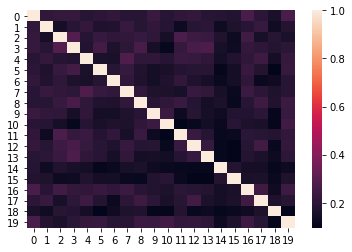

In [0]:
# Bag of Words Heatmap
import seaborn as sns
sns.heatmap(cosine_bow)

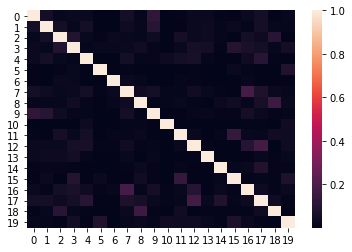

In [0]:
# TFIDF Heatmap
sns.heatmap(cosine_tfidf)

In [0]:
def normalize(df):
  mn = 1
  mx = 0
  for i, j in df.iterrows():
    for x in j:
      if (abs(1-x) > 0.0000002):
        mn = min(mn, x)
        mx = max(mx, x)
  return df.applymap(lambda x : (x-mn)/(mx-mn) if abs(1-x) > 0.0000002 else 1)

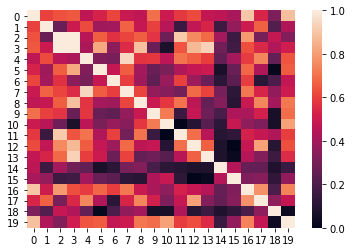

In [0]:
sns.heatmap(normalize(cosine_bow))

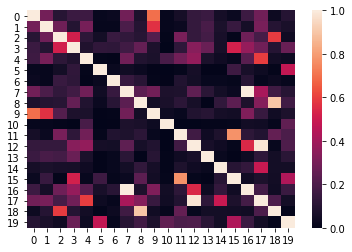

In [0]:
sns.heatmap(normalize(cosine_tfidf))

To give a bit of description on the playlist, it's a "nostalgia" playlist containing songs dating from the 60s even until the 00s. Hence, the songs in the playlist span different eras of music which  means that the songs may be very different in terms of words used and the themes of the songs. To illustrate this difference, we look at the similarities in language through the cosine similarity metric used below.

Initially, the cosine similarity pairs for both BoW and TFIDF were very low, mostly within the range of 0.0 to 0.3. In a vacuum, this means that songs aren't really similar at all to each other, at least with respect to the lyrics of the songs. Again, the songs vary in terms of their release dates and thus their "generations", so the vocabulary and themes used vary, from friendly to romantic to breakup to even infatuation with a place.

We can the BoW Heatmap has a slightly lighter tone than the TFIDF one, indicating slightly higher similarity scores. However, since we wanted to look at the relative similarities instead of looking at them in a vacuum, we decided to normalize these scores. After normalizing, we noticed that there were more _relatively_ similar pairs of songs in the BoW matrix, such as I Wanna Dance with Somebody by Whitney Houston and My Girl by The Temptations. This may be because of words used that are similar to each other or even words that appear in both songs in the pair. For example, "hot" was used in the former song while "cold" was used in the latter, while "feel" and "way" appeared in both songs. In a nutshell, the BoW has more relatively similar songs because they look at the words used without gauging their importance in the songs, so songs that use cloesly associated words may be similar.

This is where TFIDF comes in. The heatmap for TFIDF looks terrible, however, but it's because the importance is looked at there. There are fewer relatively similar pairs of songs, and most of them still have a low cosine similarity score. Going back to our example of Whiteney Houston and The Temptations, this time the score is a lot lower because the similar words mention (hot, cold, feel, way) have differing importance in the two songs, or aren't even important at all ("hot" and "cold" are only mentioned once or twice in both songs).

# Five Most Important Words

You can find the 5 important words for each song below. We can see that most of the time, the words in the title, if these words aren't stopwords, are also found in the most important words. If not the title, the words in the chorus are found. This is because the chorus is the most repeated part of the song usually.

As for being summaries, these words aren't enough still because a lot of these words should be stopwords (e.g. ooh, gogo, woah, im) even though they aren't, so these don't convey much meaning, if at all.

In [0]:
impt_df = pd.DataFrame(columns=['title', 'important_words'])
for index, row in tfidf_df.iterrows():
  impt_df.loc[index] = {
      'title': playlist_dict[index][0],
      'important_words': ' '.join(tfidf_df.iloc[index][tfidf_df.iloc[index] > 0].sort_values(ascending=False).head().index)
  }

impt_df

,title,important_words
0,I Wanna Dance with Somebody (Who Loves Me),somebody dance wanna loves dontcha
1,Wake Me up Before You Go-Go,gogo wake jitterbug hit dancing
2,Take on Me,take ill gone away anyway
3,Build Me Up Buttercup,build buttercup hey worst oohoohooh
4,Easy,easy morning sunday im thats
5,Hey Jude,na jude naa hey better
6,September,deeya badeeya baduda september remember
7,You Make My Dreams,ooh dreams waiting true well
8,Never Gonna Give You Up,gonna never give tell hurt
9,Dancing Queen,queen dancing digging dance jive


# **Bonus**

The following is a TF-IDF analysis of the top 5 songs of the band **Bread**. We identify the top 10 most important words and discuss an analysis of these.

In [0]:
# Searches for artist URI
results = sp.search("artist:bread")
artist_id = results['tracks']['items'][0]['artists'][0]['uri']
print(artist_id)

#sp.artist_top_tracks(artist_id)

spotify:artist:70ZTdbPEcEugBNay4MvxfL


In [0]:
ARTIST_URI = 'spotify:artist:70ZTdbPEcEugBNay4MvxfL' # Artist URI of the band Bread
ARTIST = 'Bread'
TOP_SONGS = 5

artist_tracks = sp.artist_top_tracks(ARTIST_URI)
track_dict = {}

for i, track in enumerate(artist_tracks['tracks'][:TOP_SONGS]):
    title = track['name']
    track_dict[i] = title

print(track_dict)

{0: 'Everything I Own', 1: 'Make It with You', 2: 'Guitar Man', 3: 'If', 4: "Baby I'm-a Want You"}


In [0]:
# import lyricsgenius

songs = track_dict
lyrics_dict_2 = {}
genius = lyricsgenius.Genius("lgrmQD5L0EqGrGCqmiXmHvizYtaDYeu5gAn0TRwD3FPEzE1WRL_Y2mBAZTdrMGB-")

for song in songs:
    lyric = genius.search_song(songs[song], ARTIST)
    #print(lyric.lyrics,"\n")
    lyrics_dict_2[songs[song]] = lyric.lyrics

print(lyrics_dict_2)

Searching for "Everything I Own" by Bread...
Done.
Searching for "Make It with You" by Bread...
Done.
Searching for "Guitar Man" by Bread...
Done.
Searching for "If" by Bread...
Done.
Searching for "Baby I'm-a Want You" by Bread...
Done.
{'Everything I Own': "You sheltered me from harm\nKept me warm, kept me warm\nYou gave my life to me\nSet me free, set me free\nThe finest years I ever knew\nWere all the years I had with you\n\n[Chorus]\nAnd I would give anything I own\nWould give up my life, my heart, my home\nI would give everything I own\nJust to have you back again\n\nYou taught me how to love\nWhat it's of, what it's of\nYou never said too much\nBut still you showed the way\nAnd I knew from watching you\nNobody else could ever know\nThe part of me that can't let go\n\n[Chorus]\nAnd I would give anything I own\nWould give up my life, my heart, my home\nI would give everything I own\nJust to have you back again\n\nIs there someone you know\nYou're loving them so\nBut taking them al

In [0]:
# Using functions from above, we use TF-IDF on the artist's top 5 song
addtl_stopwords = ['chorus','verse','1','2','3','4','5']

lines_from_dict = get_song_lines_from_dict(lyrics_dict_2)
for i in lines_from_dict:
  for j in i:
    if j in addtl_stopwords:
      i.remove(j)

tfidf_df = tfidf(lines_from_dict)
cosine_tfidf = cosine_similarity_matrix_tfidf(tfidf_df)
cosine_tfidf

,0,1,2,3,4
0,1.000000,0.014689,0.006894,0.078519,0.005835
1,0.014689,1.000000,0.102986,0.053731,0.036539
2,0.006894,0.102986,1.000000,0.032511,0.024088
3,0.078519,0.053731,0.032511,1.000000,0.009721
4,0.005835,0.036539,0.024088,0.009721,1.000000


In [0]:
tfidf_df

,going,hes,taught,giving,thousand,keeps,kept,moving,warm,free,man,without,find,words,two,sound,fly,ever,thats,wrong,life,hear,5,music,finest,singalong,3,let,thing,makes,every,say,dont,running,maybe,everything,someone,might,place,call,...,picture,takes,plays,high,want,back,left,theyre,sleep,leading,choose,gave,help,get,heart,know,one,still,paints,well,guiding,long,always,hour,id,oh,drifting,really,listen,beside,tell,right,town,hell,rainbows,theres,ive,spend,youll,begins
0,0.000000,0.000000,0.010069,0.000000,0.000000,0.000000,0.035372,0.000000,0.035372,0.035372,0.000000,0.000000,0.000000,0.005613,0.000000,0.000000,0.000000,0.020138,0.000000,0.000000,0.009809,0.017686,0.000000,0.000000,0.017686,0.000000,0.000000,0.017686,0.000000,0.000000,0.000000,0.017686,0.010069,0.000000,0.000000,0.053058,0.035372,0.000000,0.000000,0.000000,...,0.000000,0.017686,0.000000,0.000000,0.000000,0.053058,0.000000,0.000000,0.000000,0.000000,0.000000,0.017686,0.000000,0.000000,0.053058,0.004904,0.0,0.017686,0.000000,0.000000,0.000000,0.005613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011040,0.000000,0.019391,0.008065,0.000000,0.019391,0.000000,0.000000,0.000000,0.019391,0.000000,0.019391,0.000000,0.011040,0.000000,0.011040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.006155,0.000000,0.000000,0.038782,0.038782,0.019391,0.019391,0.000000,0.022079,0.000000,0.000000,0.005377,0.0,0.000000,0.000000,0.038782,0.000000,0.006155,0.000000,0.000000,0.044159,0.000000,0.000000,0.044159,0.000000,0.000000,0.019391,0.011040,0.000000,0.000000,0.019391,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.012979,0.012979,0.000000,0.000000,0.000000,0.038938,0.000000,0.012979,0.000000,0.000000,0.029558,0.000000,0.022168,0.004120,0.000000,0.012979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012979,0.000000,0.012979,0.000000,0.000000,0.000000,0.012979,0.007389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012979,0.038938,0.012979,...,0.000000,0.000000,0.012979,0.025959,0.004120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038938,0.000000,0.003599,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012979,0.000000,0.025959,0.000000,0.000000,0.007389,0.012979,0.025959,0.000000,0.000000,0.000000,0.000000,0.000000,0.012979
3,0.000000,0.000000,0.000000,0.000000,0.053648,0.000000,0.000000,0.000000,0.000000,0.000000,0.015272,0.000000,0.000000,0.017028,0.026824,0.000000,0.026824,0.000000,0.026824,0.000000,0.003719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.026824,0.000000,0.000000,0.000000,0.000000,0.000000,0.026824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003719,0.0,0.000000,0.026824,0.000000,0.000000,0.000000,0.000000,0.000000,0.030543,0.000000,0.000000,0.000000,0.000000,0.015272,0.000000,0.000000,0.000000,0.000000,0.000000,0.026824,0.026824,0.026824,0.000000,0.000000
4,0.000000,0.000000,0.012056,0.021177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021177,0.012056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021177,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012056,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.021177,0.006721,0.042354,0.021177,0.000000,0.021177,0.000000,0.012056,0.000000,0.024113,0.000000,0.

## Analysis

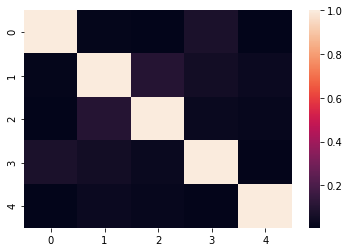

In [0]:
sns.heatmap(cosine_tfidf)

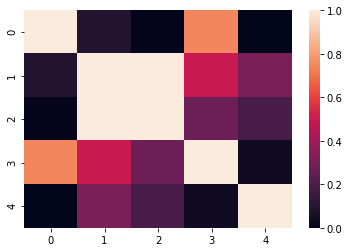

In [0]:
sns.heatmap(normalize(cosine_tfidf))


Bread is a 70's soft rock band. Most of their songs, at least in the lyrics, capture the 70's culture. Using Spotify's API, we retrieved the band's five most popular songs, and mined each songs' lyrics from Genius.com. 

We used TF-IDF to analyze the songs' lyrics and came up with a similar looking heatmap as the ones used from the playlist analysis. Obviously, the lyrics of the songs don't quite look similar with each other, as the cosine similarity pairs for TF-IDF were very low. This isn't surprising since an artist would most probably write different songs depending on its topic and that no two songs are inherently similar, lyrics-wise. Making songs with similar topics and word content would make the artist bland.

Much like we did previously, normalizing the cosine similarity lightened the tone of the heatmap. This means that some songs became more 'similar' to certain songs, such as *Everything I Own* and *If*. 

Below is the normalized TF-IDF matrix for the top 5 songs from Bread:

In [0]:
normalize(cosine_tfidf)

,0,1,2,3,4
0,1.000000,0.091133,0.010900,0.748158,0.000000
1,0.091133,1.000000,1.000000,0.493008,0.316038
2,0.010900,1.000000,1.000000,0.274579,0.187879
3,0.748158,0.493008,0.274579,1.000000,0.039998
4,0.000000,0.316038,0.187879,0.039998,1.000000


### Top 10 words

Given below are the most common words per song. This however won't effectively give us a glimpse of the most important words if the top 5 songs were aggregated. Thus, in the next cell, we see gather the 10 words with the greatest summed TF-IDF scores.

In [0]:
# Most important words for each song

impt_df = pd.DataFrame(columns=['title', 'important_words'])
for index, row in tfidf_df.iterrows():
    impt_df.loc[index] = {
        'title': track_dict[index],
        'important_words': ', '.join(tfidf_df.iloc[index][tfidf_df.iloc[index] > 0].sort_values(ascending=False).head(10).index)
    }

impt_df

,title,important_words
0,Everything I Own,"give, would, heart, everything, back, anything..."
1,Make It with You,"make, girl, really, id, dreams, sleep, us, kee..."
2,Guitar Man,"play, guitar, miles, keeps, get, something, go..."
3,If,"thousand, come, world, id, would, ships, paint..."
4,Baby I'm-a Want You,"ima, need, baby, youll, emotions, praying, use..."


In [0]:
# 10 most important words for the top 5 songs
from collections import Counter

impt_dict = {}
for (colName, colData) in tfidf_df.iteritems():
    impt_dict[colName] = colData.sum()

top = Counter(impt_dict)
top.most_common(10)


[('ima', 0.19059133173561713),
 ('give', 0.1591751781528231),
 ('would', 0.12116518469105127),
 ('make', 0.10318509116227612),
 ('id', 0.07470161388371627),
 ('baby', 0.0717174641257978),
 ('play', 0.06489669001750405),
 ('need', 0.06353044391187238),
 ('girl', 0.058172454666292776),
 ('really', 0.056215046486255235)]

The top 10 words of Bread's top 5 songs were given above. The top word "I'm-a", spelled here as *'ima'*, only appeared in the song *Baby I'm-a Want You* although it appeared in that song many times. The other words appeared in 2 or more songs and are given much more importance than any other words given their aggregated TF-IDF scores. Unsuprisingly, some of these words are already found in their respective song's titles or within the choruses of certain songs.